In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import re 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dropout,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords

/kaggle/input/email-classification-nlp/SMS_train.csv
/kaggle/input/email-classification-nlp/SMS_test.csv


In [2]:
df_train = pd.read_csv("../input/email-classification-nlp/SMS_train.csv",encoding='latin-1')
df_test = pd.read_csv("../input/email-classification-nlp/SMS_test.csv",encoding='latin-1')

In [3]:
df_train.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [4]:
df_test.isnull().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [5]:
df_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [6]:
df_test.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [7]:
df_train['Label']=df_train['Label'].map({'Spam':1.0,'Non-Spam':0.0})
df_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,0.0
1,2,The guy did some bitching but I acted like i'd...,0.0
2,3,"Pity, * was in mood for that. So...any other s...",0.0
3,4,Will ü b going to esplanade fr home?,0.0
4,5,This is the 2nd time we have tried 2 contact u...,1.0


In [8]:
df_test['Label']=df_test['Label'].map({'Spam':1.0,'Non-Spam':0.0})
df_test.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",1.0
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",1.0
2,3,Congrats! Nokia 3650 video camera phone is you...,1.0
3,4,URGENT! Your Mobile number has been awarded wi...,1.0
4,5,Someone has contacted our dating service and e...,1.0


<AxesSubplot:xlabel='count', ylabel='Label'>

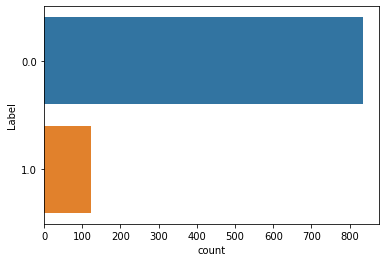

In [9]:
sns.countplot(data=df_train,y='Label')

In [10]:
import plotly.express as px
fig = px.pie(df_train, names='Label', title ='Pie chart of spam and non-spam')
fig.show()

In [11]:
def process(text):
    text = text.lower()
    text = re.sub("(http|https|www)(:|\.)\S+.com"," ",text)
    text = re.sub("[^\w\d]"," ",text)
    text = text.split()
    text = " ".join([t for t in text if t not in stopwords.words('english')])
    return text 

In [12]:
df_train = df_train.rename(columns={"Message_body":"Email"})
df_train.head()

,S. No.,Email,Label
0,1,Rofl. Its true to its name,0.0
1,2,The guy did some bitching but I acted like i'd...,0.0
2,3,"Pity, * was in mood for that. So...any other s...",0.0
3,4,Will ü b going to esplanade fr home?,0.0
4,5,This is the 2nd time we have tried 2 contact u...,1.0


In [13]:
df_test = df_test.rename(columns={"Message_body":"Email"})
df_test.head()

,S. No.,Email,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",1.0
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",1.0
2,3,Congrats! Nokia 3650 video camera phone is you...,1.0
3,4,URGENT! Your Mobile number has been awarded wi...,1.0
4,5,Someone has contacted our dating service and e...,1.0


In [14]:
print(df_train['Email'][0])
print(process(df_train['Email'][0]))

Rofl. Its true to its name
rofl true name


In [15]:
print(df_test['Email'][0])
print(process(df_test['Email'][0]))

UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available
upgrdcentre orange customer may claim free camera phone upgrade loyalty call 0207 153 9153 offer ends 26th july c apply opt available


In [16]:
X = list(map(process, df_train['Email']))

In [17]:
vocab_size = 5000
max_len = 30

In [18]:
token = Tokenizer(num_words=vocab_size)
token.fit_on_texts(X)

x_train = token.texts_to_sequences(X)

In [19]:
x_test = list(map(process, df_test['Email']))
x_test = token.texts_to_sequences(x_test)

In [20]:
x_test =  pad_sequences(x_test,padding='pre',truncating='pre',maxlen=max_len)

In [21]:
x_train =  pad_sequences(x_train,padding='pre',truncating='pre',maxlen=max_len)

In [22]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 1179,  187,  164],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  219, 1180,  702,   12,  515,
         397,  138,  220,   92,   41,  398,   72,    8],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 1181, 1182, 1183],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   27,  102,   34,  703, 1184,   28],
       [   0,    0,    0,    0,    0,    0,    0,    0,  267,   13,  325,
           3,   93,    1,    1,  399,  704,   73,    3,   51,  221,    2,
        1185, 1186,  400,  222, 

In [23]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 2191,  136,  239,   51,    8,  175,   49,
           2, 1535, 2996, 2746,   63,  392, 1347, 2765],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  382,  620, 1108,
          43,  152,    2,    8,  805,   44,   29,  152],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  549,  182,  507,  175,   49,    2,  487,  644,  282,
        2651,    2, 2706,  642,  199, 2065, 1130, 2260],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  116,   31,   47,  237,  386,   73,
         154,    2,  623,  203,   51,  624,  269,  431],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         358,  853,  163,   49, 

In [24]:
model = Sequential([
    Embedding(vocab_size,100,input_length=max_len),
    Dropout(0.2),
    LSTM(200),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

2022-10-07 12:54:38.532464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 12:54:38.536310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 12:54:38.537037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-07 12:54:38.538678: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

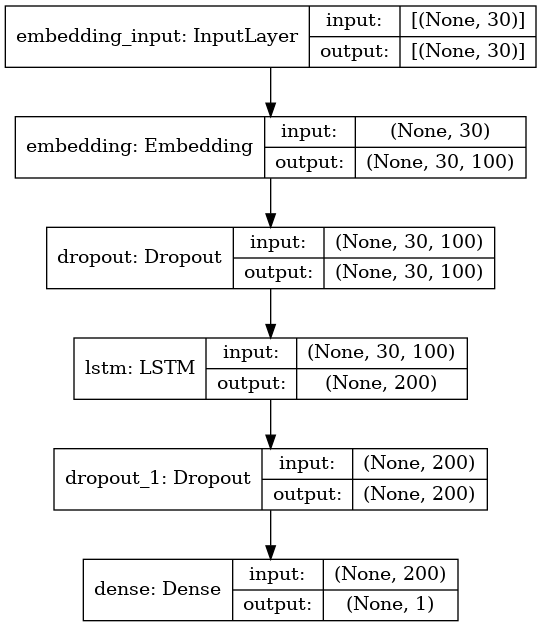

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           500000    
_________________________________________________________________
dropout (Dropout)            (None, 30, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               240800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 741,001
Trainable params: 741,001
Non-trainable params: 0
_________________________________________________________________


In [34]:
history =  model.fit(x_train,df_train['Label'],epochs=8,batch_size=32,validation_data=(x_test,df_test['Label']))

Epoch 1/8
30/30 [==============================] - 0s 7ms/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.3262 - val_acc: 0.9040
Epoch 2/8
30/30 [==============================] - 0s 6ms/step - loss: 9.6494e-04 - acc: 1.0000 - val_loss: 0.7822 - val_acc: 0.8240
Epoch 3/8
30/30 [==============================] - 0s 6ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.2877 - val_acc: 0.9120
Epoch 4/8
30/30 [==============================] - 0s 7ms/step - loss: 8.8158e-04 - acc: 1.0000 - val_loss: 0.8050 - val_acc: 0.8560
Epoch 5/8
30/30 [==============================] - 0s 6ms/step - loss: 1.9851e-04 - acc: 1.0000 - val_loss: 0.8578 - val_acc: 0.8560
Epoch 6/8
30/30 [==============================] - 0s 6ms/step - loss: 1.2040e-04 - acc: 1.0000 - val_loss: 0.8007 - val_acc: 0.8560
Epoch 7/8
30/30 [==============================] - 0s 6ms/step - loss: 8.4057e-05 - acc: 1.0000 - val_loss: 0.8323 - val_acc: 0.8560
Epoch 8/8
30/30 [==============================] - 0s 6ms/step - loss: 5.9942

<AxesSubplot:title={'center':'Loss'}>

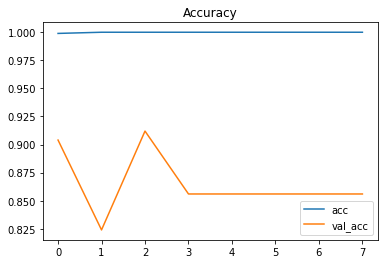

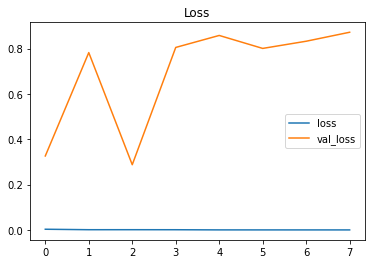

In [35]:
history_df = pd.DataFrame(history.history)
history_df[['acc','val_acc']].plot(title='Accuracy')
history_df[['loss','val_loss']].plot(title='Loss')

In [36]:
loss,acc = model.evaluate(x_test,df_test['Label'])
acc

4/4 [==============================] - 0s 3ms/step - loss: 0.8720 - acc: 0.8560


0.8560000061988831